# Simulation result analysis

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os 
from Config import Config
from tqdm import tqdm
from matplotlib.gridspec import GridSpec

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 20

filepath = "./npy/"
c = Config()
figpath = "./../../fig/Sim_2DNidelva/Cases/"
print(os.listdir(figpath))
print(os.listdir(filepath))


[]
['ivr.npy', 'README.md', 'EIBV.npy', 'equal.npy']


In [8]:
data = np.load(filepath + "equal.npy")
data

array([[[ 1200.        , -1500.        ],
        [ 1559.98427246, -1503.36505342],
        [ 1919.96854491, -1506.73010685],
        [ 1897.31488655, -1147.44357528],
        [ 2078.01898368,  -836.08200206]],

       [[ 1200.        , -1500.        ],
        [ 1559.98427246, -1503.36505342],
        [ 1919.96854491, -1506.73010685],
        [ 2004.2581698 , -1156.73687957],
        [ 1779.24259878,  -875.72443714]],

       [[ 1200.        , -1500.        ],
        [ 1559.98427246, -1503.36505342],
        [ 1919.96854491, -1506.73010685],
        [ 1952.94555945, -1148.2436824 ],
        [ 1708.70784107,  -883.76695957]]])

[[<matplotlib.lines.Line2D at 0x11b433e80>],

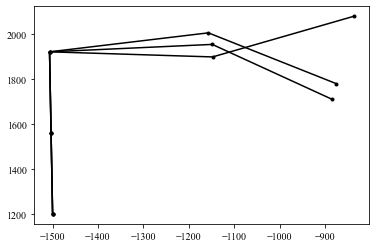

In [9]:
[plt.plot(data[i, :, 1], data[i, :, 0], 'k.-') for i in range(data.shape[0])]


In [2]:
pb = c.get_polygon_border()
po = c.get_polygon_obstacle()

In [43]:
s1 = np.load(filepath + "eibv_ivr_1.90_0.10.npy")
s2 = np.load(filepath + "eibv_ivr_0.10_1.90.npy")
s3 = np.load(filepath + "eibv_ivr_1.00_1.00.npy")

def plotf(s, i): 
    plt.plot(pb[:, 1], pb[:, 0], 'r-.')
    plt.plot(po[:, 1], po[:, 0], 'r-.')
    for j in range(s.shape[0]):
        plt.plot(s[j, :i, 1], s[j, :i, 0], 'k.-', alpha=.1)
    plt.gca().set_aspect('equal')
    plt.xlabel("East")
    plt.ylabel("North")
#     plt.title("Iteration: " + str(i))

for i in tqdm(range(s1.shape[1])):

    fig = plt.figure(figsize=(30, 10))
    gs = GridSpec(nrows=1, ncols=3)
    ax = fig.add_subplot(gs[0])
    plotf(s1, i)
    ax.set_title("EIBV: {:.2f}, IVR: {:.2f}".format(1.9, .1))

    ax = fig.add_subplot(gs[1])
    plotf(s2, i)
    ax.set_title("EIBV: {:.2f}, IVR: {:.2f}".format(.1, 1.9))

    ax = fig.add_subplot(gs[2])
    plotf(s3, i)
    ax.set_title("EIBV: {:.2f}, IVR: {:.2f}".format(1., 1.))

    plt.savefig(figpath + "P_{:03d}.png".format(i))
    plt.close("all")
#     plt.show()
#     if i == 2: 
#         break

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:51<00:00,  1.03s/it]


[]

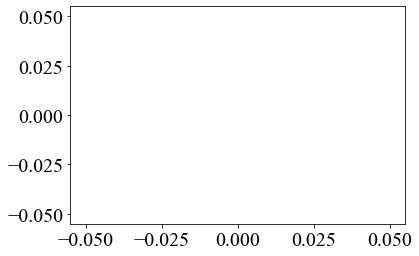